In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", index_col=0 , na_values=-99.99, parse_dates= True)
returns.head()

<= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
192607   NaN  -0.43    1.52   2.68  -0.57   0.59   1.60   1.47   3.33  -1.45   
192608   NaN   3.90    3.04   2.09   3.84   3.59   3.71   1.61   2.33   5.12   
192609   NaN  -1.08   -0.54   0.16  -0.48  -1.40   0.00  -0.50  -0.09   0.93   
192610   NaN  -3.32   -3.52  -3.06  -3.29  -4.10  -2.89  -3.36  -2.95  -4.84   
192611   NaN  -0.46    3.82   3.09  -0.55   2.18   3.41   3.39   3.16  -0.78   

        Dec 2  Dec 3  Dec 4  Dec 5  Dec 6  Dec 7  Dec 8  Dec 9  Hi 10  
192607   0.29  -0.15   1.33   1.24   1.98   1.55   1.38   3.38   3.29  
192608   2.59   4.03   3.15   2.72   4.72   1.60   1.63   0.98   3.70  
192609  -1.87  -2.27  -0.53   0.07  -0.07  -1.64   0.64  -0.86   0.67  
192610  -1.77  -3.36  -4.83  -2.98  -2.80  -3.45  -3.27  -3.47  -2.43  
192611  -0.32  -0.29   4.65   3.24   3.57   3.82   2.95   3.61   2.70

In [2]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.index = returns.index.to_period('M')
returns.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [3]:
returns = returns/100
returns.head()

<= 0   Lo 30  Med 40   Hi 30   Lo 20   Qnt 2   Qnt 3   Qnt 4   Hi 20  \
1926-07   NaN -0.0043  0.0152  0.0268 -0.0057  0.0059  0.0160  0.0147  0.0333   
1926-08   NaN  0.0390  0.0304  0.0209  0.0384  0.0359  0.0371  0.0161  0.0233   
1926-09   NaN -0.0108 -0.0054  0.0016 -0.0048 -0.0140  0.0000 -0.0050 -0.0009   
1926-10   NaN -0.0332 -0.0352 -0.0306 -0.0329 -0.0410 -0.0289 -0.0336 -0.0295   
1926-11   NaN -0.0046  0.0382  0.0309 -0.0055  0.0218  0.0341  0.0339  0.0316   

          Lo 10   Dec 2   Dec 3   Dec 4   Dec 5   Dec 6   Dec 7   Dec 8  \
1926-07 -0.0145  0.0029 -0.0015  0.0133  0.0124  0.0198  0.0155  0.0138   
1926-08  0.0512  0.0259  0.0403  0.0315  0.0272  0.0472  0.0160  0.0163   
1926-09  0.0093 -0.0187 -0.0227 -0.0053  0.0007 -0.0007 -0.0164  0.0064   
1926-10 -0.0484 -0.0177 -0.0336 -0.0483 -0.0298 -0.0280 -0.0345 -0.0327   
1926-11 -0.0078 -0.0032 -0.0029  0.0465  0.0324  0.0357  0.0382  0.0295   

          Dec 9   Hi 10  
1926-07  0.0338  0.0329  
1926-08  0.0098  0.0370  
1926-09 -0.0086  0.0067  
1926-10 -0.0347 -0.0243  
1926-11  0.0361  0.0270

In [4]:
def drawdown(ret_ser: pd.Series):
    """
    Lets Calculate it:
    1. Compute wealth index
    2. Compute previous peaks
    3. Compute Drawdown - which is the wealth value as a percentage of the previous peak
    """
    wealth_index = 1000*(1+ret_ser).cumprod()
    prev_peak = wealth_index.cummax()
    draw_down = (wealth_index-prev_peak)/prev_peak
    return pd.DataFrame({
        "Wealth Index": wealth_index,
        "Previous Peak": prev_peak,
        "Drawdown" : draw_down        
    })

In [5]:
df = drawdown(returns["Lo 10"])
df.head()

Wealth Index  Previous Peak  Drawdown
1926-07    985.500000     985.500000  0.000000
1926-08   1035.957600    1035.957600  0.000000
1926-09   1045.592006    1045.592006  0.000000
1926-10    994.985353    1045.592006 -0.048400
1926-11    987.224467    1045.592006 -0.055822

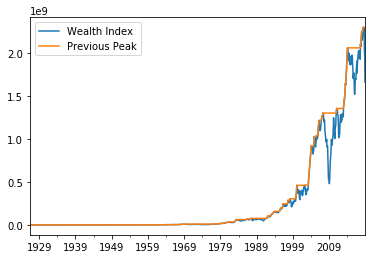

In [6]:
df[["Wealth Index","Previous Peak"]].plot()

In [7]:
df

Wealth Index  Previous Peak  Drawdown
1926-07  9.855000e+02   9.855000e+02  0.000000
1926-08  1.035958e+03   1.035958e+03  0.000000
1926-09  1.045592e+03   1.045592e+03  0.000000
1926-10  9.949854e+02   1.045592e+03 -0.048400
1926-11  9.872245e+02   1.045592e+03 -0.055822
...               ...            ...       ...
2018-08  2.298938e+09   2.298938e+09  0.000000
2018-09  2.260316e+09   2.298938e+09 -0.016800
2018-10  2.033832e+09   2.298938e+09 -0.115317
2018-11  1.959597e+09   2.298938e+09 -0.147608
2018-12  1.659583e+09   2.298938e+09 -0.278109

[1110 rows x 3 columns]

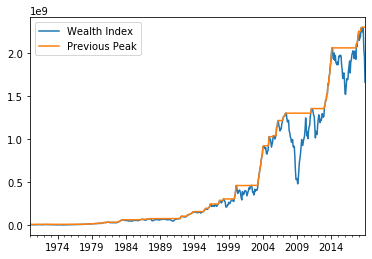

In [8]:
df["1970":][["Wealth Index","Previous Peak"]].plot()